# 비지도학습 군집분석: 정답지가 없는 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
data = pd.read_csv("./data/shopping-data.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# 군집분석(계층적 군집, 비계층적 군집)
* 계층적 군집
  * 비지도학습
  * 데이터가 적을 때 사용(5000개 이하)
  * 거리 계산 지표: 유클리드, 맨하탄, 코사인 유사도
* 계층적 군집 5가지
  * 단일연결법(single linkage), 최단연결법: 군집과 군집 사이에서 가장 가까운 데이터를 기준으로 묶음
  * 완전연결법(complite linkage), 최장연결법: 군집과 군집 사이에서 가장 먼 데이터를 기준으로 묶음
  * 평균연결법(average linkage): 군집과 군집 사이의 모든 데이터의 평균 데이터로 계산(이상치에 덜 민감)
  * 중심연결법(centroid linkage): 군집과 중심점 사이의 거리를 거리로 측정한 방법, 계산이 빠름
  * 와드연결법(ward linkage): 군집내 오차가 최소가 되는 데이터로 계산, 군집내 분산이 최소, 조밀한 군집
* 계층적 군집의 시각화는 덴드로그램으로 한다.

In [4]:
data2 = data.copy()

In [5]:
import scipy.cluster.hierarchy as shc

In [6]:
data = pd.get_dummies(data, drop_first=True)
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False
...,...,...,...,...,...
195,196,35,120,79,False
196,197,45,126,28,False
197,198,32,126,74,True
198,199,32,137,18,True


In [7]:
data = data.drop('CustomerID', axis=1)
data

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


# 데이터 스케일링 standard, minmax, robust

In [8]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<Axes: >

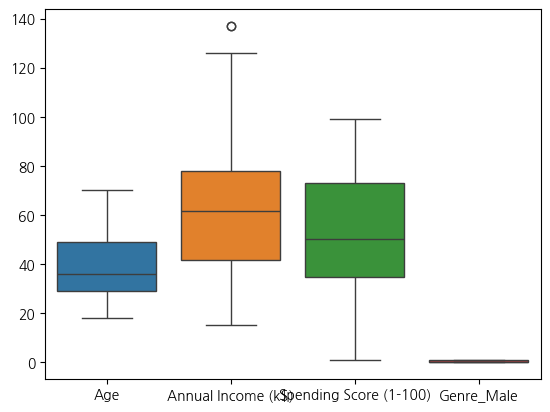

In [9]:
sns.boxplot(data)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
data.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male'], dtype='object')

In [13]:
num_cols = data.drop('Genre_Male', axis=1)
num_cols

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [14]:
num_cols.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [15]:
scaled = scaler.fit_transform(num_cols)
scaled = pd.DataFrame(scaled, columns=num_cols.columns)
scaled_df = pd.concat([scaled, data['Genre_Male']], axis=1)
scaled_df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,-1.424569,-1.738999,-0.434801,True
1,-1.281035,-1.738999,1.195704,True
2,-1.352802,-1.700830,-1.715913,False
3,-1.137502,-1.700830,1.040418,False
4,-0.563369,-1.662660,-0.395980,False
...,...,...,...,...
195,-0.276302,2.268791,1.118061,False
196,0.441365,2.497807,-0.861839,False
197,-0.491602,2.497807,0.923953,True
198,-0.491602,2.917671,-1.250054,True


# 단일연결법/single linkage/ 최단연결법

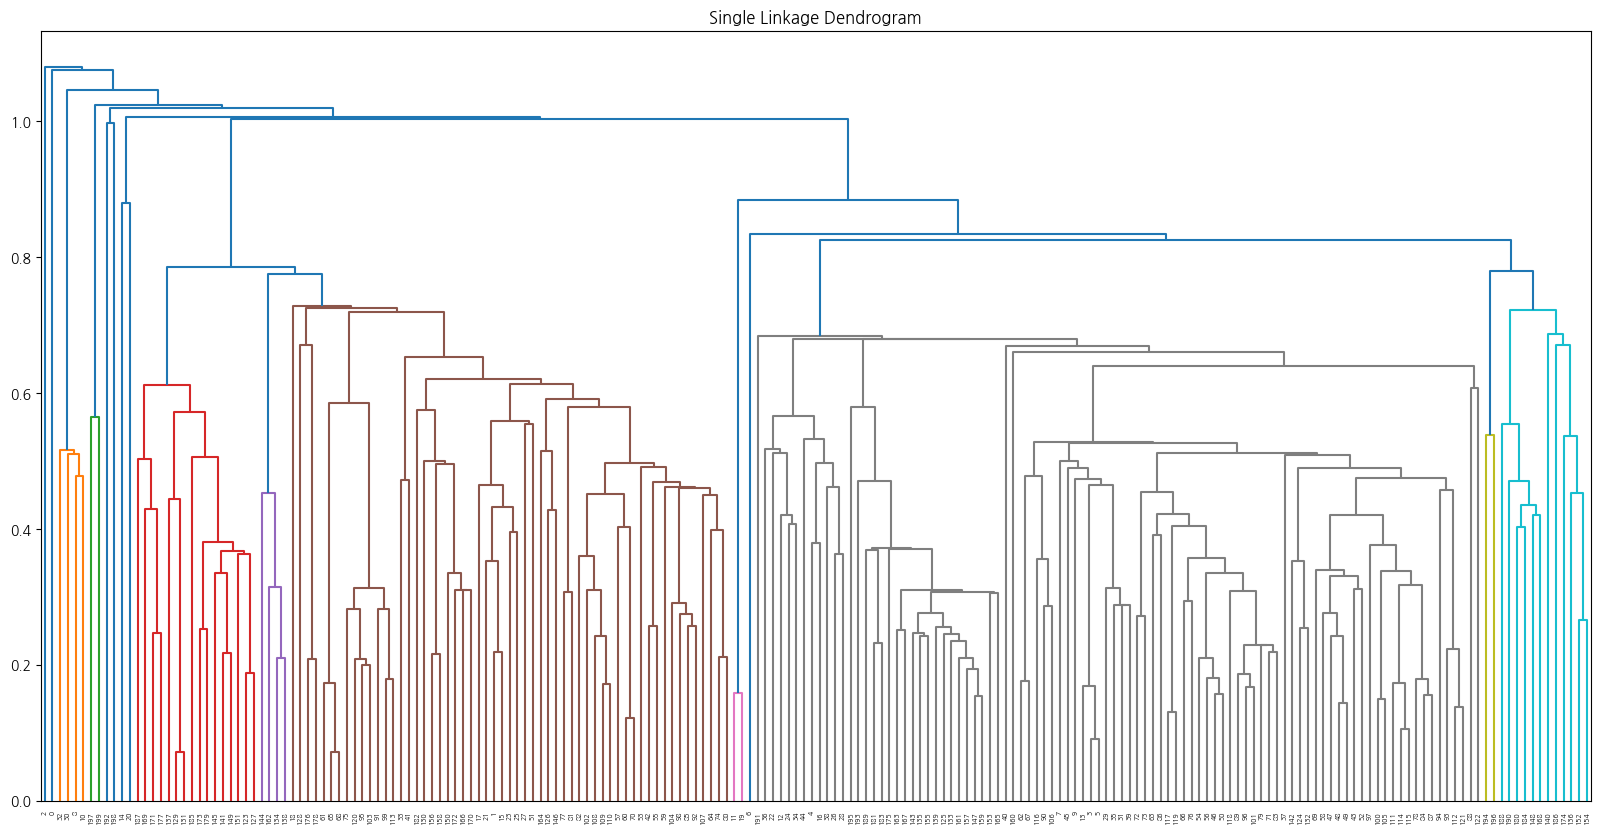

In [16]:
plt.figure(figsize=(20,10))
plt.title('Single Linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(scaled_df, method='single'))
plt.show()

# 완전연결법/최장연결법/complite linkage

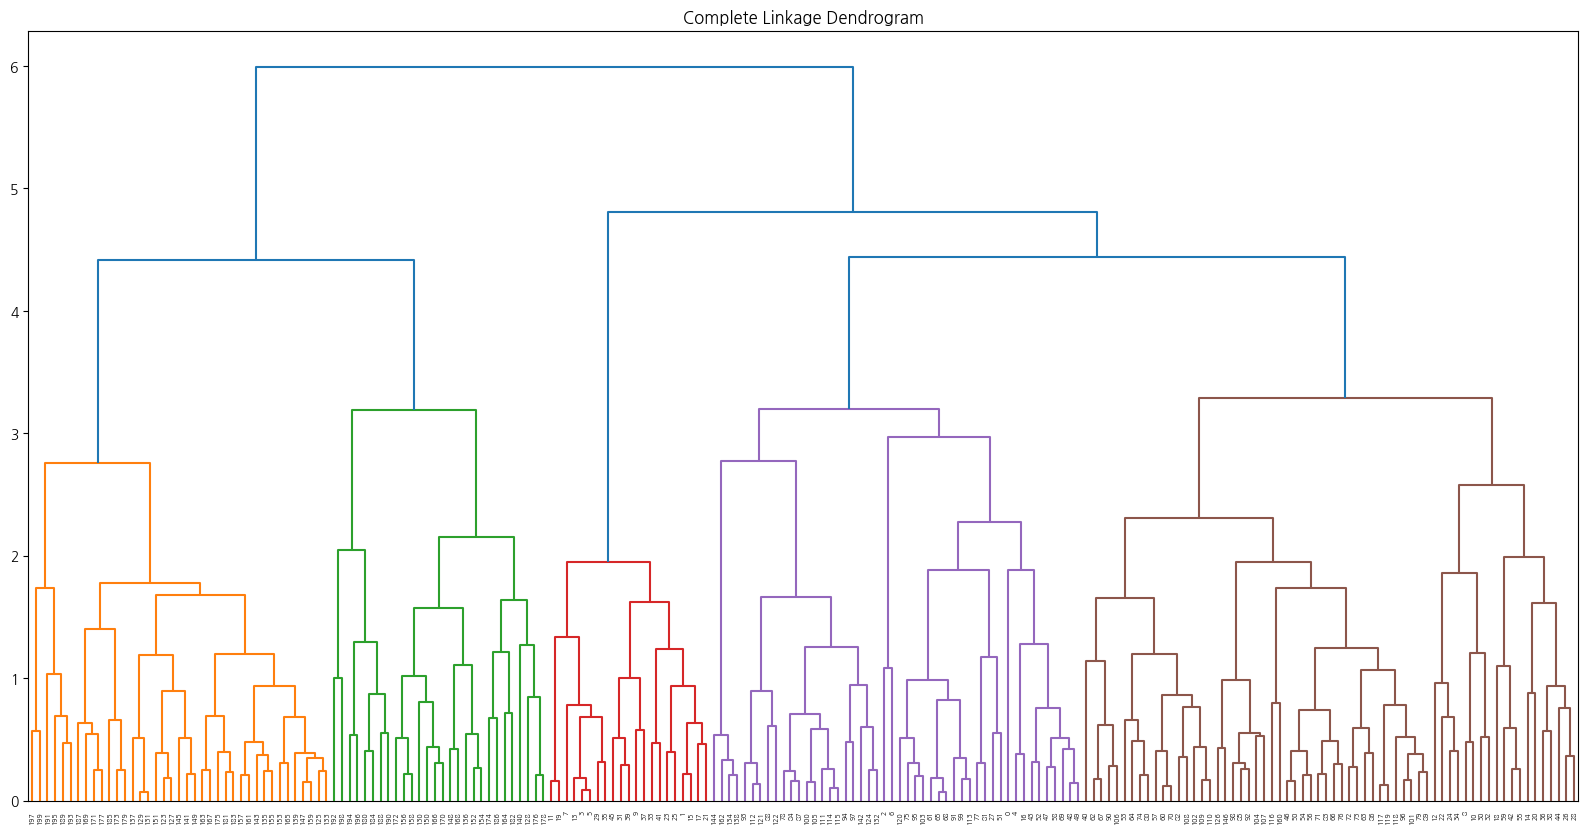

In [17]:
plt.figure(figsize=(20,10))
plt.title('Complete Linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(scaled_df, method='complete'))
plt.show()

# 평균연결법(average linkage)

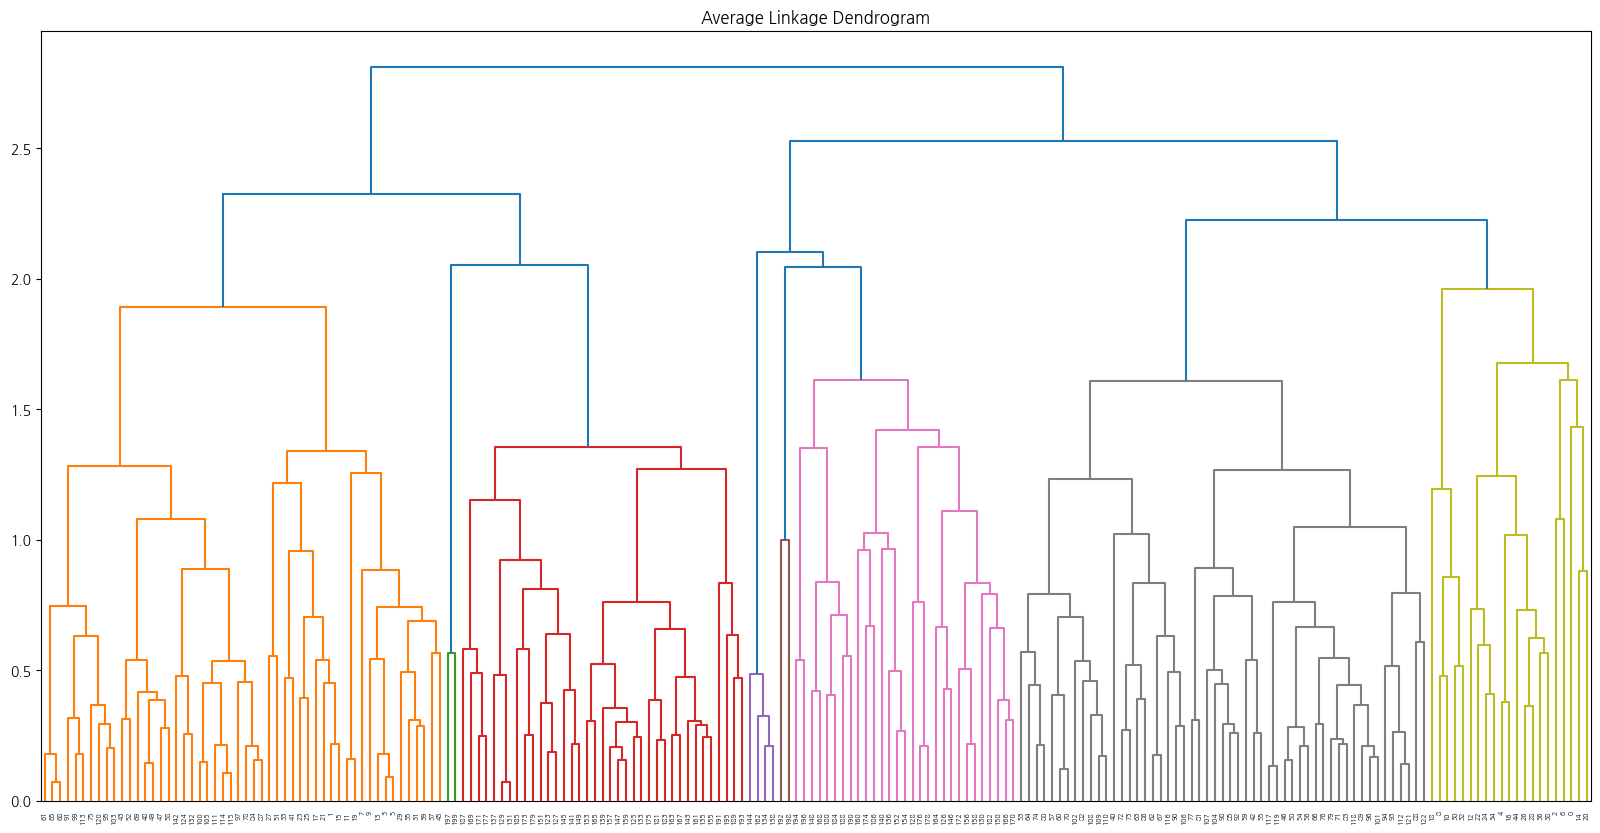

In [18]:
plt.figure(figsize=(20,10))
plt.title('Average Linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(scaled_df, method='average'))
plt.show()

# 중심연결법(centroid linkage)

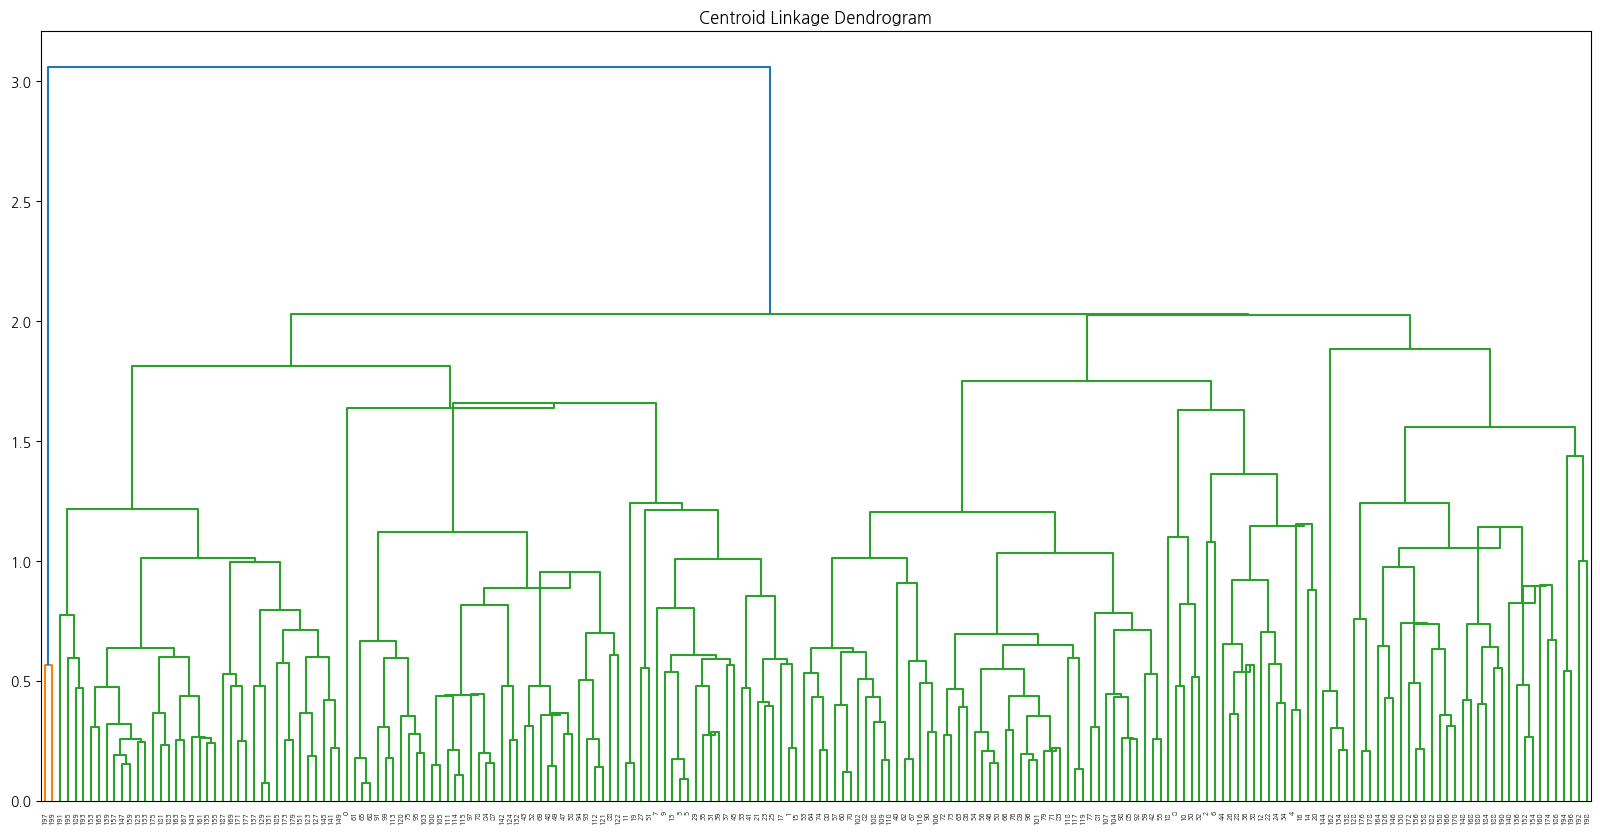

In [19]:
plt.figure(figsize=(20,10))
plt.title('Centroid Linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(scaled_df, method='centroid'))
plt.show()

# 와드연결법(ward linkage)

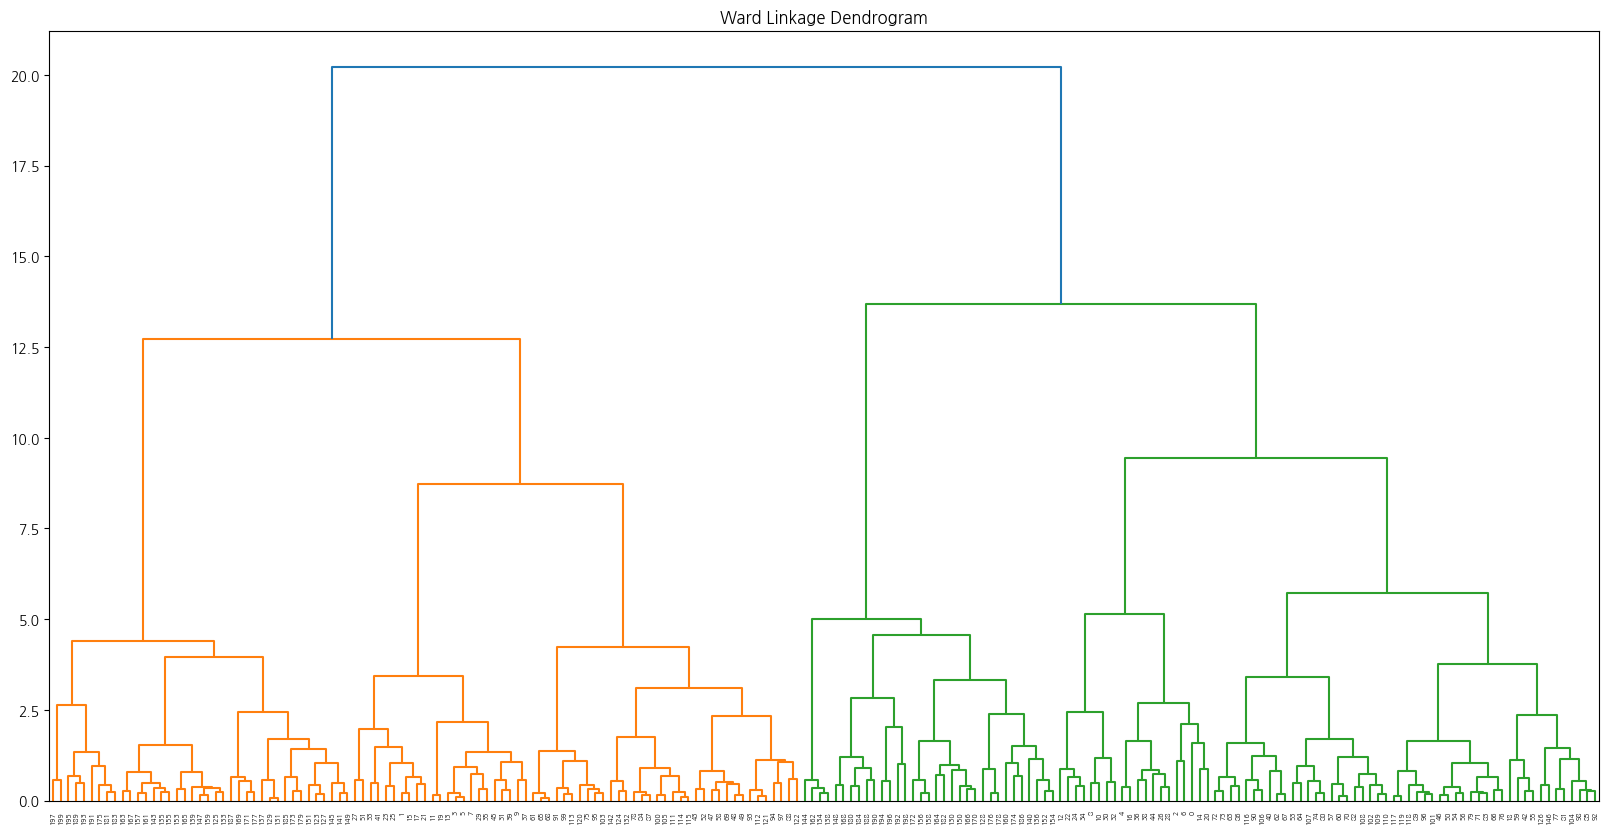

In [20]:
plt.figure(figsize=(20,10))
plt.title('Ward Linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(scaled_df, method='ward'))
plt.show()

# scikit-learn 계층적 군집

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
single = AgglomerativeClustering(n_clusters=3, linkage='single')
result = single.fit_predict(scaled_df)
result

array([2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [23]:
data['single'] = result
data

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single
0,19,15,39,True,2
1,21,15,81,True,0
2,20,16,6,False,1
3,23,16,77,False,0
4,31,17,40,False,0
...,...,...,...,...,...
195,35,120,79,False,0
196,45,126,28,False,0
197,32,126,74,True,0
198,32,137,18,True,0


In [24]:
average = AgglomerativeClustering(n_clusters=3, linkage='average')
result = average.fit_predict(scaled_df)
data['average'] = result
data

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single,average
0,19,15,39,True,2,1
1,21,15,81,True,0,0
2,20,16,6,False,1,1
3,23,16,77,False,0,0
4,31,17,40,False,0,1
...,...,...,...,...,...,...
195,35,120,79,False,0,0
196,45,126,28,False,0,2
197,32,126,74,True,0,0
198,32,137,18,True,0,2


In [25]:
complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
result = complete.fit_predict(scaled_df)
data['complete'] = result
data

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single,average,complete
0,19,15,39,True,2,1,0
1,21,15,81,True,0,0,2
2,20,16,6,False,1,1,0
3,23,16,77,False,0,0,2
4,31,17,40,False,0,1,0
...,...,...,...,...,...,...,...
195,35,120,79,False,0,0,1
196,45,126,28,False,0,2,1
197,32,126,74,True,0,0,1
198,32,137,18,True,0,2,1


In [26]:
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
result = ward.fit_predict(scaled_df)
data['ward'] = result
data

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single,average,complete,ward
0,19,15,39,True,2,1,0,1
1,21,15,81,True,0,0,2,0
2,20,16,6,False,1,1,0,1
3,23,16,77,False,0,0,2,0
4,31,17,40,False,0,1,0,1
...,...,...,...,...,...,...,...,...
195,35,120,79,False,0,0,1,0
196,45,126,28,False,0,2,1,2
197,32,126,74,True,0,0,1,0
198,32,137,18,True,0,2,1,2


In [27]:
data[data['ward'] == 1].describe()

,Age,Annual Income (k$),Spending Score (1-100),single,average,complete,ward
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.0
mean,51.757143,45.514286,39.900000,0.042857,1.028571,0.0,1.0
std,11.512357,15.906195,16.076042,0.265707,0.167802,0.0,0.0
min,19.000000,15.000000,3.000000,0.000000,1.000000,0.0,1.0
25%,46.250000,33.250000,35.000000,0.000000,1.000000,0.0,1.0
50%,50.000000,48.000000,45.500000,0.000000,1.000000,0.0,1.0
75%,60.000000,58.750000,51.000000,0.000000,1.000000,0.0,1.0
max,70.000000,77.000000,60.000000,2.000000,2.000000,0.0,1.0


In [28]:
data[data['ward'] == 0].describe()

,Age,Annual Income (k$),Spending Score (1-100),single,average,complete,ward
count,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,97.0
mean,28.649485,61.711340,69.206186,0.0,0.061856,0.835052,0.0
std,6.219997,26.677456,18.078497,0.0,0.242145,0.759391,0.0
min,18.000000,15.000000,29.000000,0.0,0.000000,0.000000,0.0
25%,23.000000,40.000000,54.000000,0.0,0.000000,0.000000,0.0
50%,29.000000,64.000000,73.000000,0.0,0.000000,1.000000,0.0
75%,32.000000,78.000000,85.000000,0.0,0.000000,1.000000,0.0
max,40.000000,137.000000,99.000000,0.0,1.000000,2.000000,0.0


In [29]:
data[data['ward'] == 2].describe()

,Age,Annual Income (k$),Spending Score (1-100),single,average,complete,ward
count,33.000000,33.000000,33.000000,33.0,33.0,33.000000,33.0
mean,41.454545,89.090909,16.181818,0.0,2.0,0.848485,2.0
std,11.172206,16.451375,9.422230,0.0,0.0,0.364110,0.0
min,19.000000,71.000000,1.000000,0.0,2.0,0.000000,2.0
25%,34.000000,78.000000,10.000000,0.0,2.0,1.000000,2.0
50%,42.000000,86.000000,15.000000,0.0,2.0,1.000000,2.0
75%,47.000000,98.000000,22.000000,0.0,2.0,1.000000,2.0
max,59.000000,137.000000,39.000000,0.0,2.0,1.000000,2.0


# 비계층적 군집 - 데이터 수가 많을 때 사용 > 5000
* k-means(k 평균 군집): 거리를 기반으로 군집을 형성, 이상치에 민감함
* StandardScaler를 사용, 데이터에 이상치가 있으면 RobustScaler 사용
* 이상치가 많은 데이터를 분석시 평균이 아닌 중앙값을 이용해서 군집 형성

In [30]:
df = pd.read_csv("./data/고객이탈예측.csv", encoding='cp949')
df

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   회원ID        7043 non-null   object 
 1   성별          7043 non-null   object 
 2   고연령         7043 non-null   int64  
 3   배우자         7043 non-null   object 
 4   피부양자        7043 non-null   object 
 5   가입기간        7043 non-null   int64  
 6   전화서비스       7043 non-null   object 
 7   2회선이상       7043 non-null   object 
 8   인터넷서비스      7043 non-null   object 
 9   온라인보안       7043 non-null   object 
 10  온라인백업       7043 non-null   object 
 11  기기보호서비스     7043 non-null   object 
 12  기술지원        7043 non-null   object 
 13  스트리밍TV      7043 non-null   object 
 14  스트리밍Movies  7043 non-null   object 
 15  약정옵션        7043 non-null   object 
 16  온라인고지서      7043 non-null   object 
 17  지불수단        7043 non-null   object 
 18  월요금         7043 non-null   float64
 19  합산요금        7043 non-null  

In [32]:
df.describe()

,고연령,가입기간,월요금
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: >

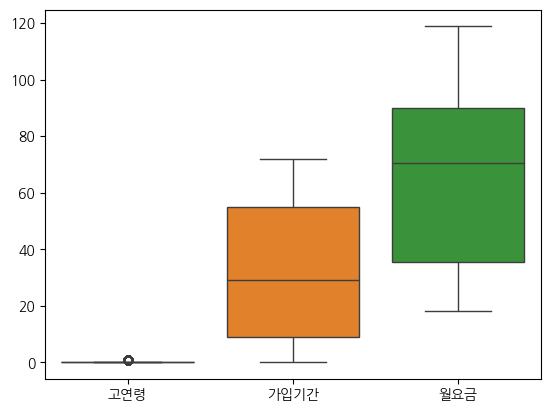

In [33]:
sns.boxplot(df)

In [34]:
df2 = df.copy()

In [35]:
df.columns

Index(['회원ID', '성별', '고연령', '배우자', '피부양자', '가입기간', '전화서비스', '2회선이상', '인터넷서비스',
       '온라인보안', '온라인백업', '기기보호서비스', '기술지원', '스트리밍TV', '스트리밍Movies', '약정옵션',
       '온라인고지서', '지불수단', '월요금', '합산요금', '이탈여부'],
      dtype='object')

In [36]:
df = df.drop('회원ID', axis=1)
df

,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [39]:
df['합산요금'] = df['합산요금'].astype(float)
df.info()

ValueError: could not convert string to float: ' '

In [38]:
df[df['합산요금'] == " "]

,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [40]:
df['합산요금'] = df['합산요금'].str.replace(" ", "0.0")

In [41]:
df['합산요금'] = df['합산요금'].astype(float)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   성별          7043 non-null   object 
 1   고연령         7043 non-null   int64  
 2   배우자         7043 non-null   object 
 3   피부양자        7043 non-null   object 
 4   가입기간        7043 non-null   int64  
 5   전화서비스       7043 non-null   object 
 6   2회선이상       7043 non-null   object 
 7   인터넷서비스      7043 non-null   object 
 8   온라인보안       7043 non-null   object 
 9   온라인백업       7043 non-null   object 
 10  기기보호서비스     7043 non-null   object 
 11  기술지원        7043 non-null   object 
 12  스트리밍TV      7043 non-null   object 
 13  스트리밍Movies  7043 non-null   object 
 14  약정옵션        7043 non-null   object 
 15  온라인고지서      7043 non-null   object 
 16  지불수단        7043 non-null   object 
 17  월요금         7043 non-null   float64
 18  합산요금        7043 non-null   float64
 19  이탈여부        7043 non-null  

In [43]:
cat_cols = df.select_dtypes(include='object')
cat_cols['고연령'] = df['고연령']
cat_cols = pd.get_dummies(cat_cols, drop_first=True)
cat_cols

,고연령,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,인터넷서비스_Fiber optic,인터넷서비스_No,온라인보안_No internet service,...,스트리밍TV_Yes,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes
0,0,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,True,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,True,True,True,True,False,True,False,False,False,...,True,False,True,True,False,True,False,False,True,False
7039,0,False,True,True,True,False,True,True,False,False,...,True,False,True,True,False,True,True,False,False,False
7040,0,False,True,True,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
7041,1,True,True,False,True,False,True,True,False,False,...,False,False,False,False,False,True,False,False,True,True


In [44]:
num_cols = df.select_dtypes(exclude='object')
num_cols = num_cols.drop('고연령', axis=1)
num_cols 

,가입기간,월요금,합산요금
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


# 숫자컬럼 스케일링

In [45]:
ss = StandardScaler()
ss_scaled = ss.fit_transform(num_cols)
ss_scaled = pd.DataFrame(ss_scaled, columns=num_cols.columns)
ss_scaled

,가입기간,월요금,합산요금
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874
...,...,...,...
7038,-0.340876,0.665992,-0.127605
7039,1.613701,1.277533,2.242606
7040,-0.870241,-1.168632,-0.852932
7041,-1.155283,0.320338,-0.870513


In [46]:
scaled_df2 = pd.concat([cat_cols, ss_scaled], axis=1)
scaled_df2

,고연령,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,인터넷서비스_Fiber optic,인터넷서비스_No,온라인보안_No internet service,...,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes,가입기간,월요금,합산요금
0,0,False,True,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,-1.277445,-1.160323,-0.992611
1,0,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,0.066327,-0.259629,-0.172165
2,0,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,True,-1.236724,-0.362660,-0.958066
3,0,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,0.514251,-0.746535,-0.193672
4,0,False,False,False,True,False,False,True,False,False,...,False,False,True,False,True,False,True,-1.236724,0.197365,-0.938874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,True,True,True,True,False,True,False,False,False,...,True,False,True,False,False,True,False,-0.340876,0.665992,-0.127605
7039,0,False,True,True,True,False,True,True,False,False,...,True,False,True,True,False,False,False,1.613701,1.277533,2.242606
7040,0,False,True,True,False,True,False,False,False,False,...,False,False,True,False,True,False,False,-0.870241,-1.168632,-0.852932
7041,1,True,True,False,True,False,True,True,False,False,...,False,False,True,False,False,True,True,-1.155283,0.320338,-0.870513


# k-means로 군집 분석하기

In [47]:
from sklearn.cluster import KMeans

In [48]:
km = KMeans(random_state=42)
km.fit(scaled_df2)
result = km.labels_
result

array([7, 5, 7, ..., 7, 2, 1], shape=(7043,), dtype=int32)

In [49]:
df['kmeans8'] = result
df

,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,...,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부,kmeans8
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,7
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,7
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,5
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,5
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,1
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,7
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,2


In [50]:
df[df['kmeans8'] == 0].describe(include='all')

,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,...,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부,kmeans8
count,614,614.000000,614,614,614.000000,614,614,614,614,614,...,614,614,614,614,614,614,614.000000,614.000000,614,614.0
unique,2,NaN,2,2,NaN,2,3,2,2,2,...,2,2,2,3,2,4,NaN,NaN,2,NaN
top,Male,NaN,Yes,No,NaN,Yes,Yes,DSL,Yes,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),NaN,NaN,No,NaN
freq,314,NaN,482,314,NaN,526,348,588,472,448,...,497,419,434,504,329,253,NaN,NaN,600,NaN
mean,NaN,0.097720,NaN,NaN,64.369707,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,75.510098,4853.148941,NaN,0.0
std,NaN,0.297178,NaN,NaN,8.305257,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.117974,955.320256,NaN,0.0
min,NaN,0.000000,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,43.950000,2198.300000,NaN,0.0
25%,NaN,0.000000,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.900000,4123.150000,NaN,0.0
50%,NaN,0.000000,NaN,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,77.675000,4772.375000,NaN,0.0
75%,NaN,0.000000,NaN,NaN,71.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,84.487500,5606.375000,NaN,0.0


In [51]:
df[df['kmeans8'] == 1].describe(include='all')

,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,...,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부,kmeans8
count,863,863.000000,863,863,863.000000,863,863,863,863,863,...,863,863,863,863,863,863,863.000000,863.000000,863,863.0
unique,2,NaN,2,2,NaN,1,2,2,2,2,...,2,2,2,3,2,4,NaN,NaN,2,NaN
top,Female,NaN,Yes,No,NaN,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),NaN,NaN,No,NaN
freq,440,NaN,638,597,NaN,863,741,860,456,660,...,473,713,723,380,662,279,NaN,NaN,729,NaN
mean,NaN,0.238702,NaN,NaN,64.066049,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,103.659849,6650.404171,NaN,1.0
std,NaN,0.426538,NaN,NaN,7.190419,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.112960,957.058563,NaN,0.0
min,NaN,0.000000,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,75.650000,4473.450000,NaN,1.0
25%,NaN,0.000000,NaN,NaN,59.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.800000,5826.075000,NaN,1.0
50%,NaN,0.000000,NaN,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,104.850000,6671.700000,NaN,1.0
75%,NaN,0.000000,NaN,NaN,71.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,109.625000,7392.300000,NaN,1.0


In [52]:
df[df['kmeans8'] == 2].describe(include='all')

,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,...,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부,kmeans8
count,1356,1356.000000,1356,1356,1356.000000,1356,1356,1356,1356,1356,...,1356,1356,1356,1356,1356,1356,1356.000000,1356.000000,1356,1356.0
unique,2,NaN,2,2,NaN,1,2,2,2,2,...,2,2,2,2,2,4,NaN,NaN,2,NaN
top,Female,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,Yes,NaN
freq,727,NaN,980,1181,NaN,1356,754,1308,1194,1075,...,1205,835,836,1337,1079,923,NaN,NaN,889,NaN
mean,NaN,0.258850,NaN,NaN,9.055310,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,82.253761,748.961578,NaN,2.0
std,NaN,0.438164,NaN,NaN,7.555495,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.798087,618.679485,NaN,0.0
min,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,59.450000,59.850000,NaN,2.0
25%,NaN,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,74.550000,193.037500,NaN,2.0
50%,NaN,0.000000,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,80.450000,580.050000,NaN,2.0
75%,NaN,1.000000,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,89.562500,1184.250000,NaN,2.0


In [53]:
df[df['kmeans8'] == 3].describe(include='all')

,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,...,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부,kmeans8
count,633,633.000000,633,633,633.000000,633,633,633,633,633,...,633,633,633,633,633,633,633.000000,633.000000,633,633.0
unique,2,NaN,2,2,NaN,1,2,1,1,1,...,1,1,1,3,2,4,NaN,NaN,2,NaN
top,Female,NaN,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),NaN,NaN,No,NaN
freq,320,NaN,441,336,NaN,633,382,633,633,633,...,633,633,633,503,444,204,NaN,NaN,625,NaN
mean,NaN,0.044234,NaN,NaN,56.025276,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,21.931517,1234.711295,NaN,3.0
std,NaN,0.205777,NaN,NaN,12.660213,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.520186,340.208203,NaN,0.0
min,NaN,0.000000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,487.950000,NaN,3.0
25%,NaN,0.000000,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.800000,967.900000,NaN,3.0
50%,NaN,0.000000,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.500000,1218.450000,NaN,3.0
75%,NaN,0.000000,NaN,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,24.700000,1468.750000,NaN,3.0


# 군집의 최적 개수 정하기
* elbow method
  * 군집 분석의 응집도(inertia_) - 요소들이 얼마나 모여있는지 판단하는 지표
  * inertia_값이 작을 수록 군집이 잘 형성됨
  * elbow method는 inertia_를 출력하고 시각화 한 뒤 응집도의 감소폭이 급격한 변화가 일어나는 지점을 최적 군집수로 채택
* 실루엣 지수 1에 가까우면 좋은 군집 수 (범위 0-1)



In [54]:
print(km.inertia_)

24209.80005060706


In [55]:
inertia = []
for i in range(2, 21):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_df2)
    inertia.append(km.inertia_)
inertia

[43374.18243887565,
 31994.01479862794,
 29339.875639339334,
 27584.629093848493,
 26444.32967955414,
 25749.759028719087,
 24209.800050607057,
 23690.381065814323,
 23081.54710855729,
 22527.917241701063,
 22138.293802450316,
 21836.91573308138,
 21580.902381005533,
 21422.29489137893,
 21162.378510349798,
 20835.70150550799,
 20670.210044736676,
 20445.138048243254,
 20299.489532932737]

* elbow method로 계산한 최적 군집 수는 3

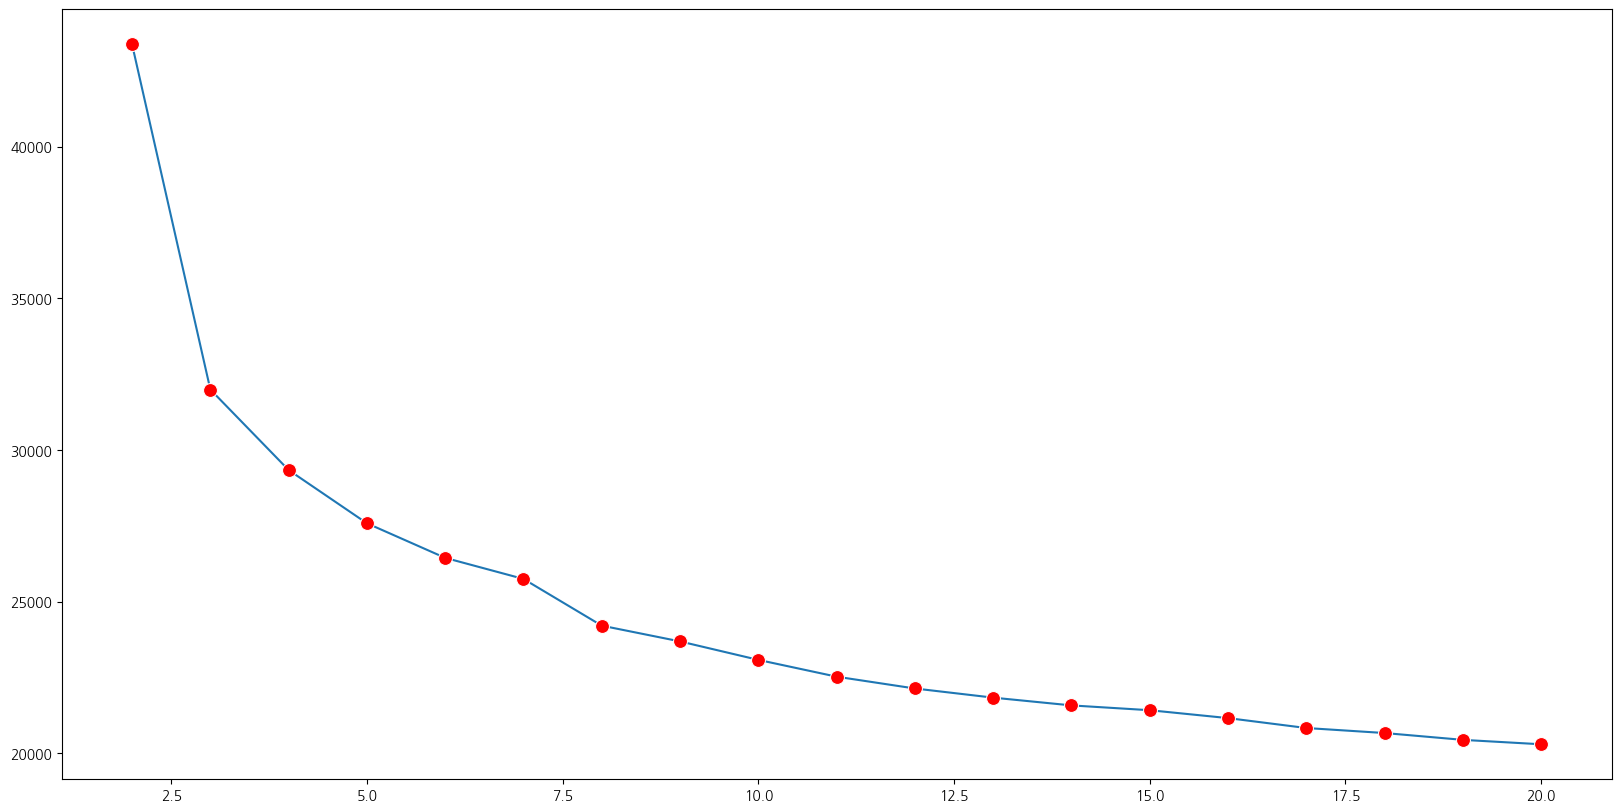

In [56]:
plt.figure(figsize=(20,10))
sns.lineplot(x=range(2, 21), y=inertia, marker='o', markersize=10, markerfacecolor='red')
plt.show()

# 실루엣 지수를 출력해서 최적군집 개수 구하기
* 실루엣 지수를 구하기 위해서는 최소 2개 이상의 군집이 필요
* 실루엣 지수가 가장 높은 클러스터 개수가 최적 군집 개수(1에 가까울 수록 좋음)

In [57]:
from sklearn.metrics import silhouette_score

In [58]:
sil_score = []
for i in range(2, 21):
    km2 = KMeans(n_clusters=i, random_state=42)
    km2.fit(scaled_df2)
    labels = km2.labels_
    sil_score.append(silhouette_score(scaled_df2, labels))
sil_score

[0.23114136530579366,
 0.2795402575361415,
 0.22605560326074667,
 0.20214223640397508,
 0.18454819485404964,
 0.17404251855761274,
 0.15134167054930217,
 0.14304983730701767,
 0.13725380808787532,
 0.1361302462592312,
 0.13410651910318905,
 0.12859599044872816,
 0.12894604831287165,
 0.12553613112548542,
 0.12554660635355555,
 0.1071042692740527,
 0.10674088444429225,
 0.10699167305891794,
 0.10612507294731718]

# 실루엣지수 계산 결과 최적 군집의 개수는 3개

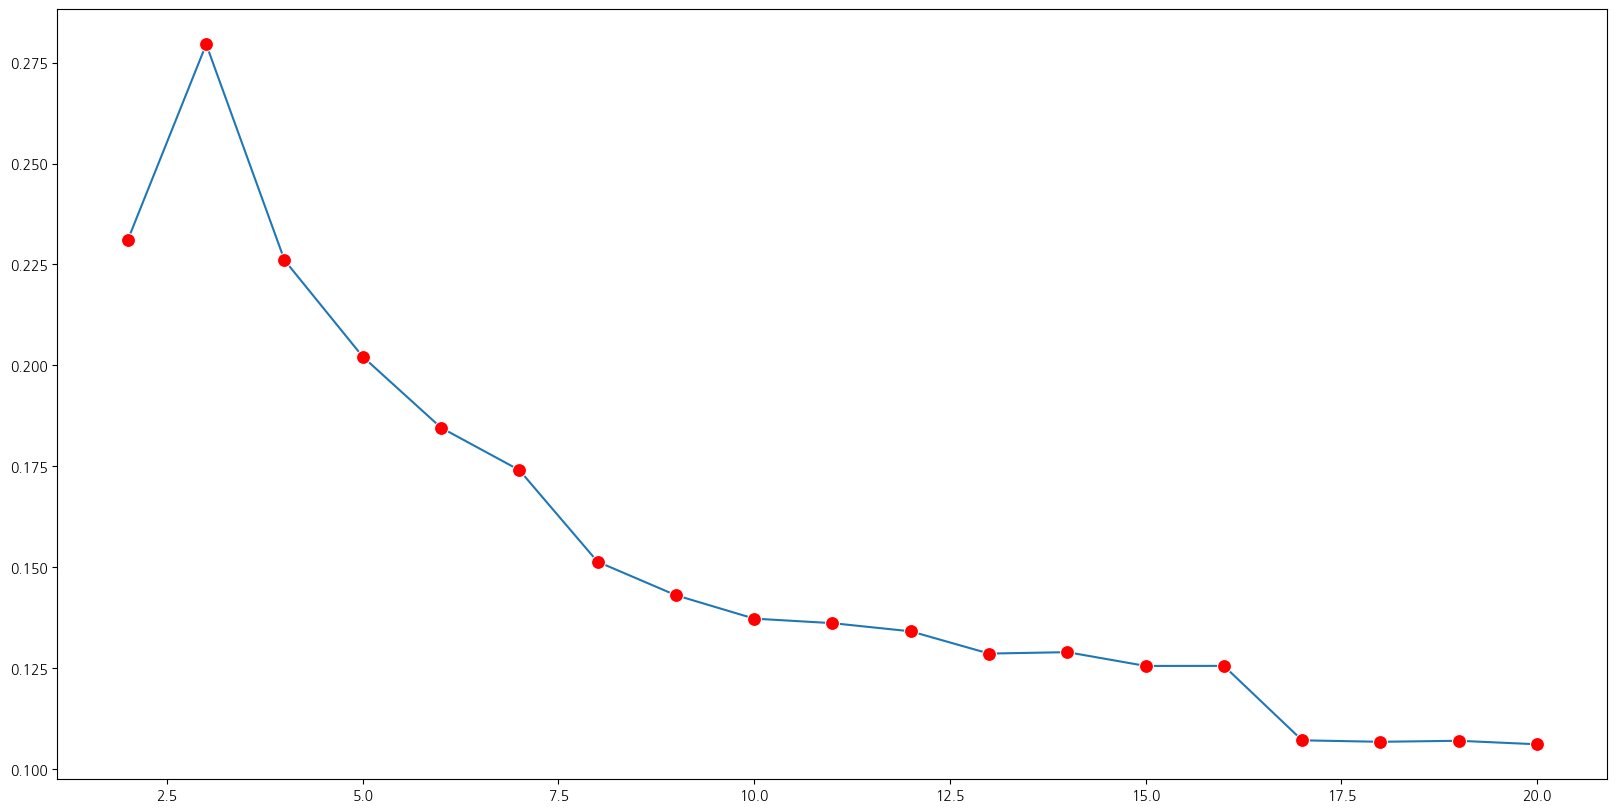

In [59]:
plt.figure(figsize=(20,10))
sns.lineplot(x=range(2, 21), y=sil_score, marker='o', markersize=10, markerfacecolor='red')
plt.show()

In [60]:
km3 = KMeans(n_clusters=3, random_state=42)
km3.fit(scaled_df2)
labels = km3.labels_

In [61]:
df['kmeans3'] = labels
df

,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,...,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부,kmeans8,kmeans3
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,7,2
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,5,2
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,7,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,5,2
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,5,2
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,1,1
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,7,2
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,2,2


In [62]:
df[df['kmeans3'] == 0].describe(include='all')

,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,...,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부,kmeans8,kmeans3
count,1526,1526.000000,1526,1526,1526.000000,1526,1526,1526,1526,1526,...,1526,1526,1526,1526,1526,1526.000000,1526.000000,1526,1526.000000,1526.0
unique,2,NaN,2,2,NaN,1,2,1,1,1,...,1,1,3,2,4,NaN,NaN,2,NaN,NaN
top,Male,NaN,No,No,NaN,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,NaN,NaN,No,NaN,NaN
freq,779,NaN,788,883,NaN,1526,1184,1526,1526,1526,...,1526,1526,638,1080,741,NaN,NaN,1413,NaN,NaN
mean,NaN,0.034076,NaN,NaN,30.547182,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.079194,662.604784,NaN,4.755570,0.0
std,NaN,0.181484,NaN,NaN,24.356507,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.164221,555.627705,NaN,1.478552,0.0
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN,3.000000,0.0
25%,NaN,0.000000,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.700000,157.825000,NaN,3.000000,0.0
50%,NaN,0.000000,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20.150000,519.200000,NaN,6.000000,0.0
75%,NaN,0.000000,NaN,NaN,52.750000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20.900000,1108.650000,NaN,6.000000,0.0


In [63]:
df[df['kmeans3'] == 1].describe(include='all')

,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,...,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부,kmeans8,kmeans3
count,2274,2274.000000,2274,2274,2274.000000,2274,2274,2274,2274,2274,...,2274,2274,2274,2274,2274,2274.000000,2274.000000,2274,2274.000000,2274.0
unique,2,NaN,2,2,NaN,2,3,2,2,2,...,2,2,3,2,4,NaN,NaN,2,NaN,NaN
top,Male,NaN,Yes,No,NaN,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),NaN,NaN,No,NaN,NaN
freq,1147,NaN,1563,1486,NaN,2107,1572,1430,1228,1531,...,1622,1635,967,1564,724,NaN,NaN,1948,NaN,NaN
mean,NaN,0.205365,NaN,NaN,57.912489,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.322933,5158.676759,NaN,1.884785,1.0
std,NaN,0.404057,NaN,NaN,12.110751,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.830285,1522.205640,NaN,1.834774,0.0
min,NaN,0.000000,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.700000,2198.300000,NaN,0.000000,1.0
25%,NaN,0.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,78.750000,3889.887500,NaN,0.000000,1.0
50%,NaN,0.000000,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92.775000,4994.375000,NaN,1.000000,1.0
75%,NaN,0.000000,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,104.100000,6315.737500,NaN,4.000000,1.0


In [64]:
df[df['kmeans3'] == 2].describe(include='all')

,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,...,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부,kmeans8,kmeans3
count,3243,3243.000000,3243,3243,3243.000000,3243,3243,3243,3243,3243,...,3243,3243,3243,3243,3243,3243.000000,3243.000000,3243,3243.000000,3243.0
unique,2,NaN,2,2,NaN,2,3,2,2,2,...,2,2,3,2,4,NaN,NaN,2,NaN,NaN
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No,NaN,NaN
freq,1629,NaN,2142,2564,NaN,2728,1671,1666,2452,2345,...,2158,2146,2762,2161,1575,NaN,NaN,1813,NaN,NaN
mean,NaN,0.192106,NaN,NaN,15.319766,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,68.094172,1021.955859,NaN,4.251311,2.0
std,NaN,0.394017,NaN,NaN,13.352265,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20.227439,874.267225,NaN,2.130112,0.0
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,23.450000,0.000000,NaN,2.000000,2.0
25%,NaN,0.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,50.950000,227.150000,NaN,2.000000,2.0
50%,NaN,0.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,70.450000,799.650000,NaN,4.000000,2.0
75%,NaN,0.000000,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,84.350000,1679.525000,NaN,7.000000,2.0
